import datasets cifar10

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#num datasets, width, length, rgb

X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

visualize data

i = 1041
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\User\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


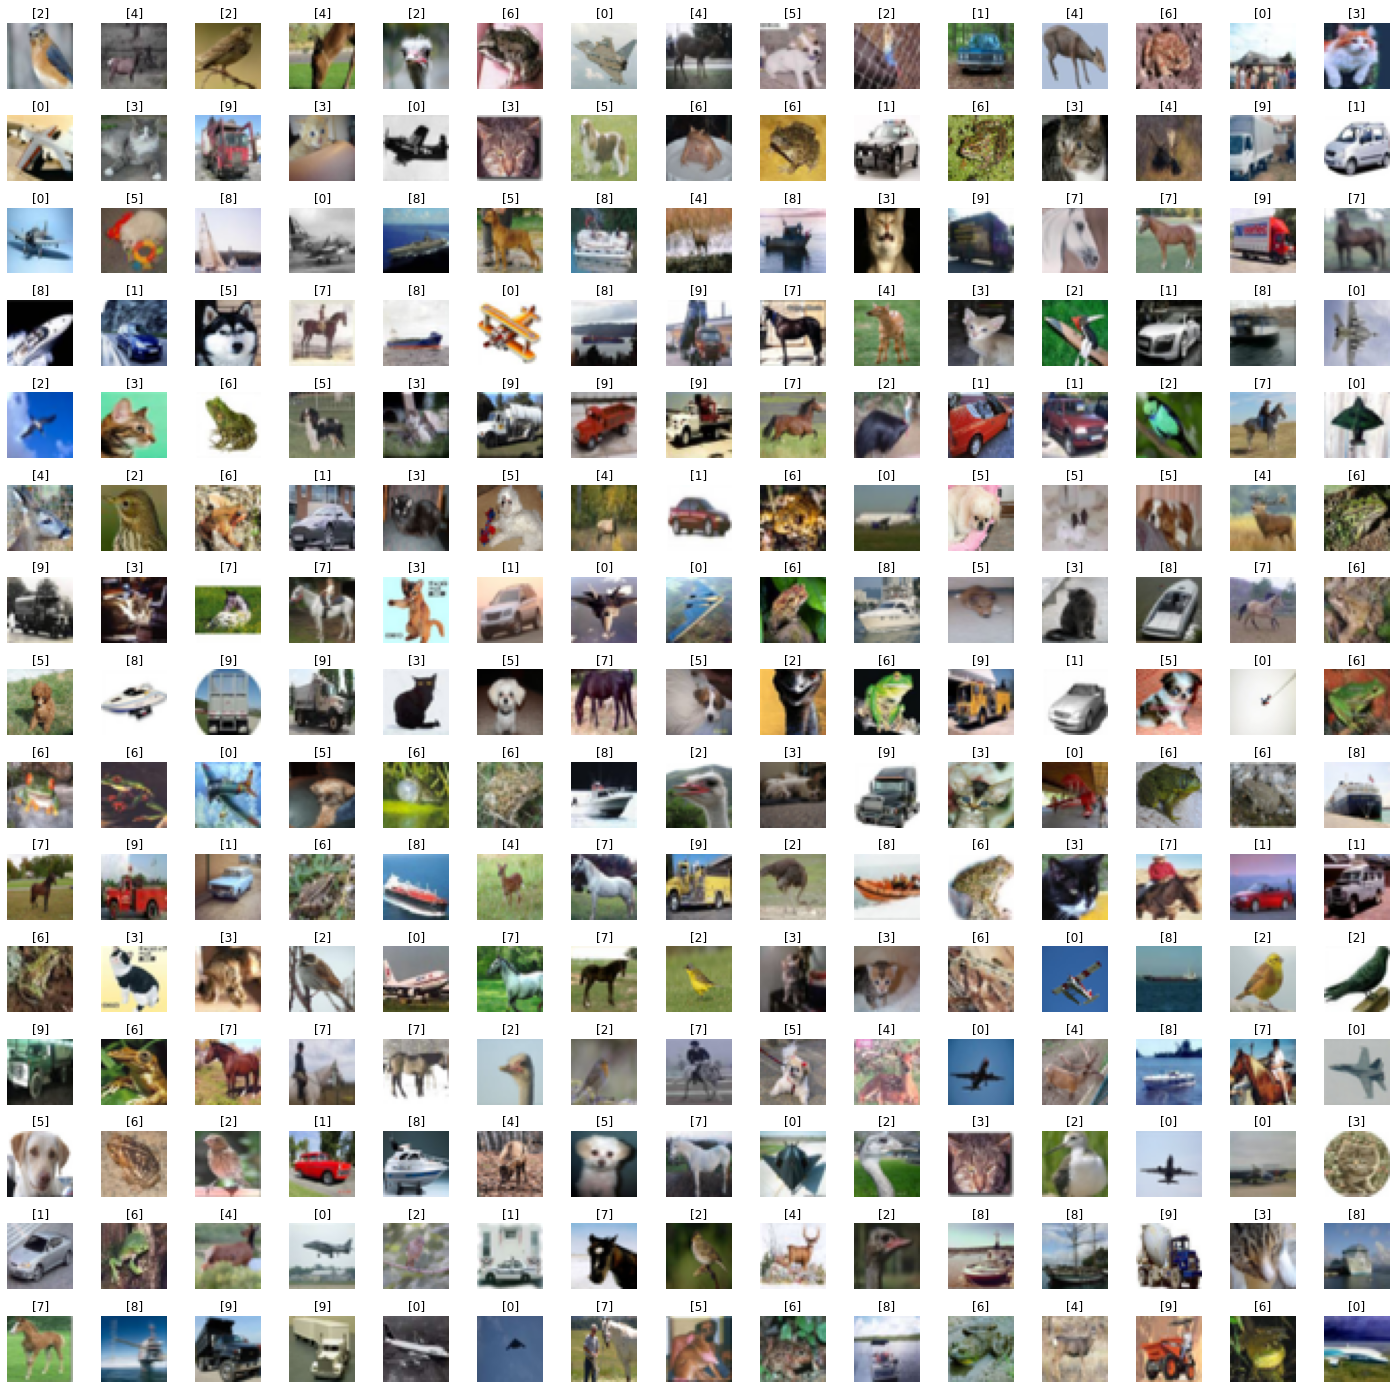

In [7]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) #random number index from X_train
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [8]:
n_training

50000

Data Preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
y_train #convert this to binary //10 outputs for neural networks

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import tensorflow
from tensorflow.keras.utils import to_categorical

y_train = tensorflow.keras.utils.to_categorical(y_train, 10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [15]:
X_train = X_train/255 #Normalize 
X_test = X_test/255

In [16]:
#X_train

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = X_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

Train Data into cnn

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [22]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [24]:
hist = cnn_model.fit(X_train, y_train, batch_size=32, epochs = 5, shuffle = True)

#shuffle images so network will independently and generalizes better

#change only 1 parameters to check the sanity of the models properly....xD

#since the input shuffles everytime neural restarted, the results is not fair
#dont simply make conclusions..

Epoch 1/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5218 - accuracy: 0.4530
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0846 - accuracy: 0.6257
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9571 - accuracy: 0.6749
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9140 - accuracy: 0.6925
Epoch 5/5
1563/1563 [==============================] - 101s 64ms/step - loss: 0.8868 - accuracy: 0.7051


evaluate model

In [25]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

313/313 [==============================] - 4s 12ms/step - loss: 0.8893 - accuracy: 0.7024
Test Accuracy : 0.7024000287055969


In [27]:
predicted_X = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_X, axis=1)
predicted_classes

array([9, 8, 0, ..., 5, 4, 7], dtype=int64)

In [42]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes1 = predicted_classes.argmax(1)
predicted_classes1

array([9, 8, 0, ..., 5, 4, 7], dtype=int64)

In [45]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [39]:
y_test1 = y_test.argmax(1)

In [40]:
y_test1

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

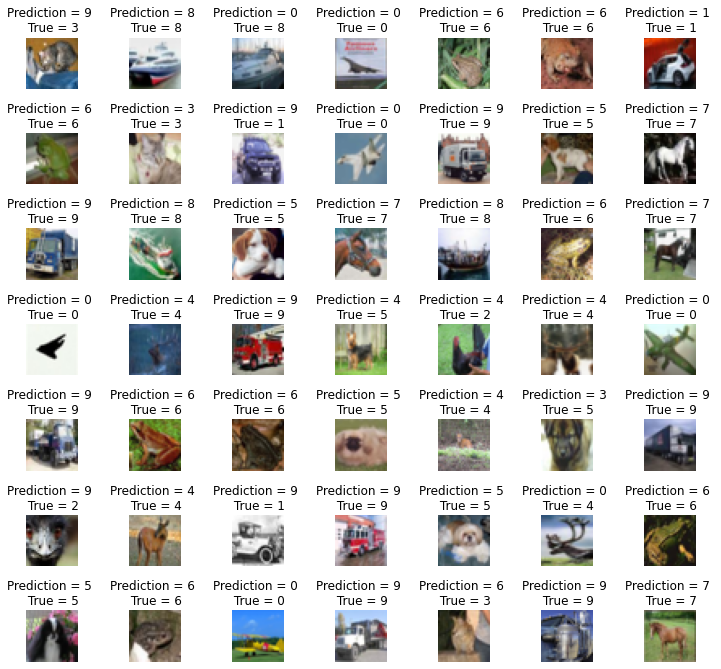

In [43]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes1[i],y_test1[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test1, predicted_classes1)
cm

array([[820,   6,  19,   4,  51,   3,   7,  11,  41,  38],
       [ 30, 806,   0,   1,  12,   2,  12,   5,  12, 120],
       [ 86,   1, 459,   6, 232,  48,  96,  53,   7,  12],
       [ 34,   7,  48, 239, 220, 178, 149,  75,  12,  38],
       [ 18,   0,  20,   6, 868,   5,  32,  37,   9,   5],
       [ 19,   2,  30,  40, 143, 599,  45, 106,   2,  14],
       [ 10,   1,  19,   3, 104,   7, 848,   4,   2,   2],
       [ 14,   0,  16,   2, 129,  42,  16, 771,   4,   6],
       [127,  30,   8,   1,  16,   8,   7,   8, 746,  49],
       [ 49,  30,   5,   1,  12,   0,   6,  12,  17, 868]], dtype=int64)

<AxesSubplot:>

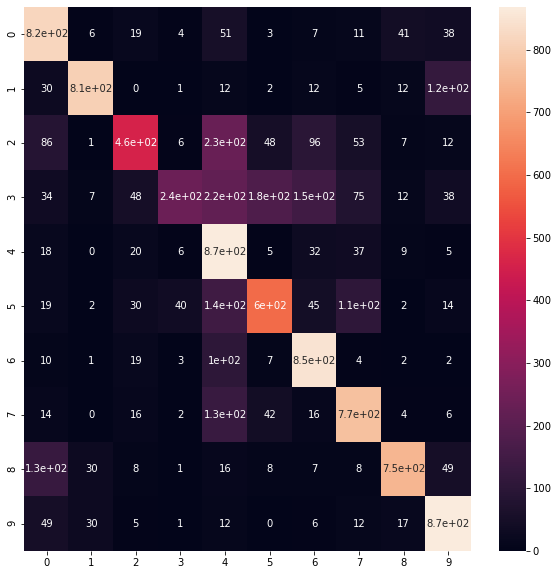

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

Save the model

In [48]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') #get current working directory

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'cnn_cifar10_trained_model.h5')
cnn_model.save(model_path)